In [1]:
import os 
import sys

import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
PATH = os.getcwd() + '/speech_commands_v0.01/'

In [3]:
def get_recording_names(word):
    
    assert word in os.listdir(PATH), "Word recording doesn't exist"
        
    return os.listdir(PATH+word)

def get_recording(filename, word):
    
    time_series, sample_rate = librosa.load(PATH+word+'/'+filename)
    
    return time_series, sample_rate

def load_recording(filename, word):
    print("Loaded:", filename)
    return ipd.Audio(PATH+word+'/'+filename)

def plot_audio_file(time_series, sampling_rate):
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(time_series, sr=sampling_rate)
    plt.show()
    
def plot_spectrogram(time_series, sampling_rate):
    
    # Short term fourier transform
    X = librosa.stft(time_series)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [4]:
bed_filenames = get_recording_names(word='bed')
ts, sr = get_recording(filename=bed_filenames[0], word='bed')
load_recording(filename=bed_filenames[0], word='bed')

Loaded: 988e2f9a_nohash_0.wav


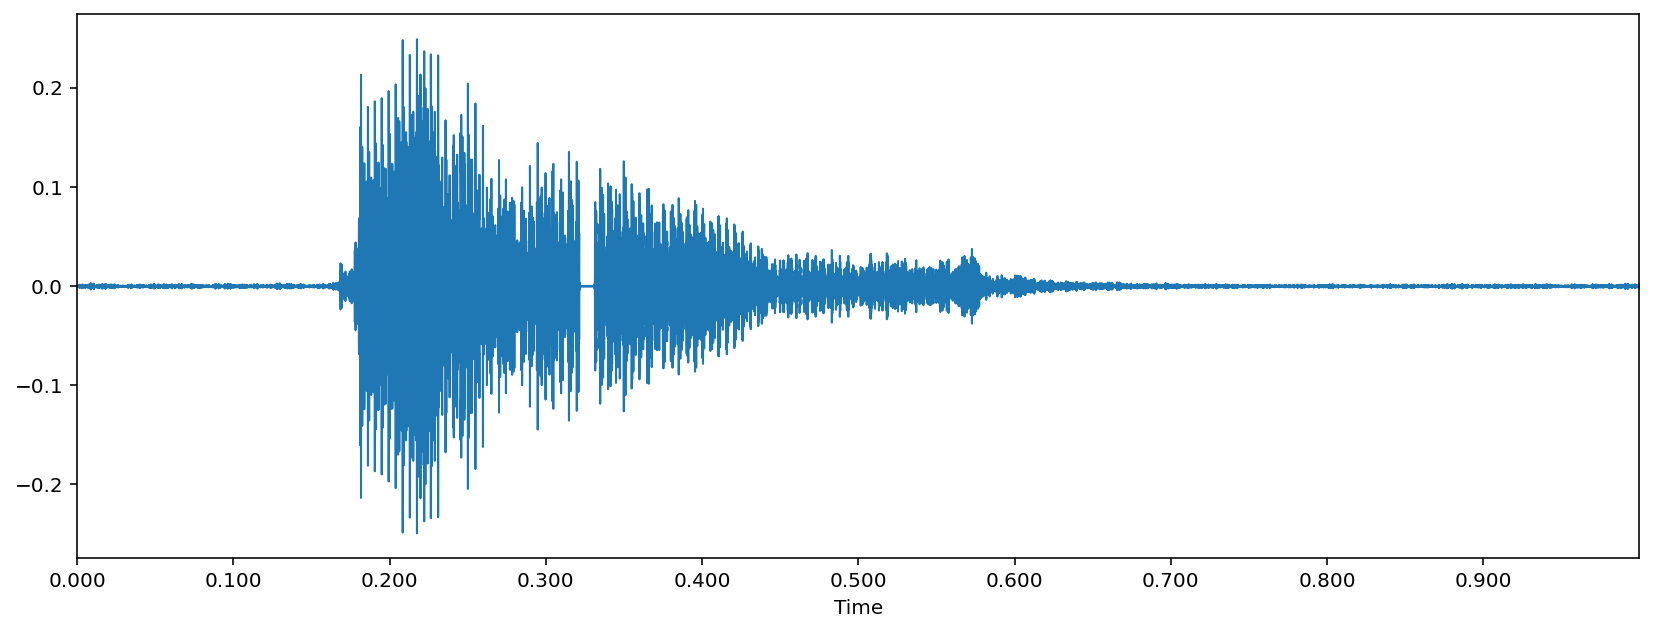

In [5]:
plot_audio_file(time_series=ts, sampling_rate=sr)

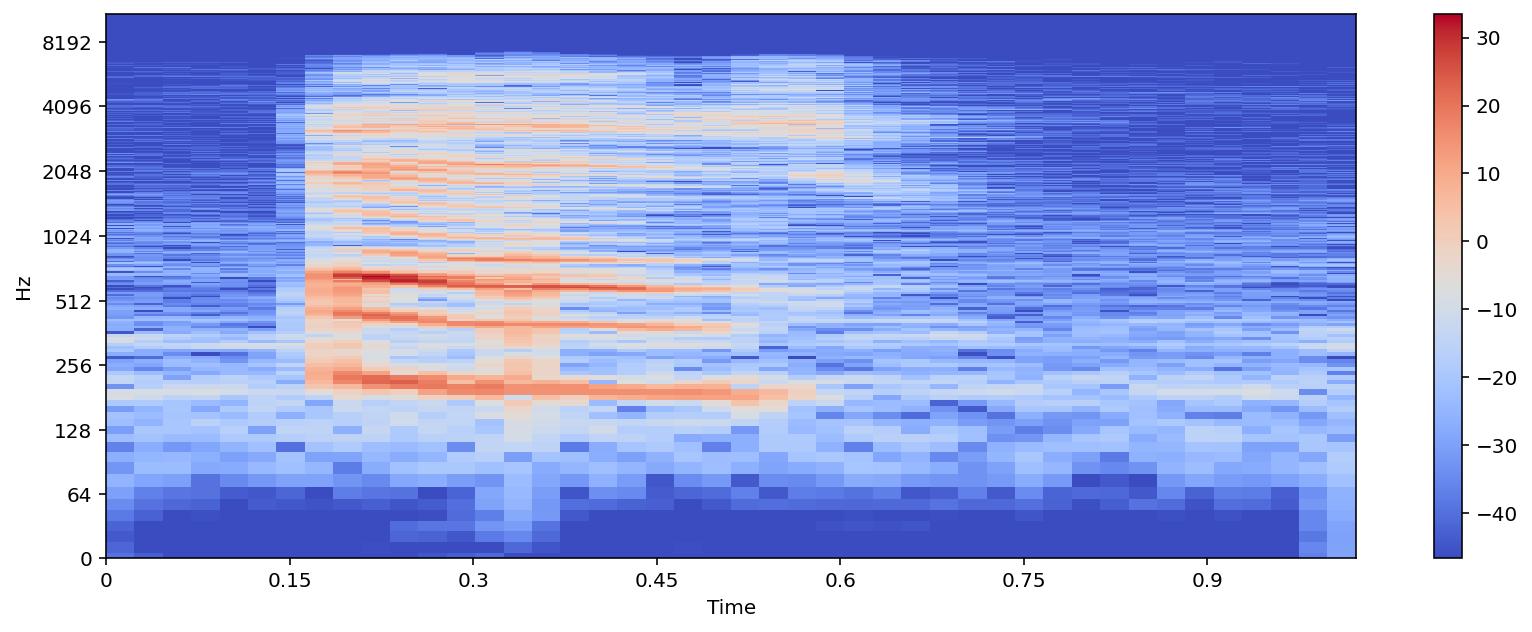

In [6]:
plot_spectrogram(time_series=ts, sampling_rate=sr)